In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv("reviews_cleaned.csv")
df = df.sample(n=5000, random_state=42)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Sentiment_Label,review_length
1501,337200,B000SU201O,A27Y75TIH2I7UT,Laura Ruby,1,1,5,1261526400,good buy,It's the same good product I've been buying in...,positive,1,34
2586,17443,B0045Z6K50,A3IPS9F0DD20L3,barallen,0,0,5,1315526400,coffeelicious,Newman's Own Extra-bold is about the only K-cu...,positive,1,33
2653,203321,B0033HPPIY,ADYEUPMJMWZYX,"shopping Mama ""Krista""",1,1,5,1296604800,Great Taste,This is a smooth coffee with a good taste. I ...,positive,1,34
1055,520188,B0012VNB70,A1VVUX5IZ2AD4D,Nora L.,3,3,1,1298160000,One word..... bleckkkk.,"I'm not opposed to change,but I do oppose chan...",negative,-1,89
705,317339,B00497LSLA,AKZ0STMI24ZKE,YvonneL,1,1,5,1346716800,Best Caramels,Solay caramels are the most delicious buttery ...,positive,1,42


In [4]:
#Information about the dataset
df.info()
#Summary statistics of the dataset
df.describe()
#returns  number of columns and rows
print(df.shape)
#check for missing values
df.isnull().sum()
#fill the empty rows
df['Summary'] = df['Summary'].fillna("No Summary")


<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1501 to 860
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      5000 non-null   int64 
 1   ProductId               5000 non-null   object
 2   UserId                  5000 non-null   object
 3   ProfileName             5000 non-null   object
 4   HelpfulnessNumerator    5000 non-null   int64 
 5   HelpfulnessDenominator  5000 non-null   int64 
 6   Score                   5000 non-null   int64 
 7   Time                    5000 non-null   int64 
 8   Summary                 5000 non-null   object
 9   Text                    5000 non-null   object
 10  Sentiment               5000 non-null   object
 11  Sentiment_Label         5000 non-null   int64 
 12  review_length           5000 non-null   int64 
dtypes: int64(7), object(6)
memory usage: 546.9+ KB
(5000, 13)


In [5]:
# Check for duplicates
print(df.duplicated().sum())
#Removes duplicated rows
data_cleaned = df.drop_duplicates()


0


In [6]:
#Handling the Outliers

#calucte the review length(Number of words in the review)
df['review_length'] = df['Text'].apply(lambda x: len(str(x).split()))

df.head()




,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Sentiment_Label,review_length
1501,337200,B000SU201O,A27Y75TIH2I7UT,Laura Ruby,1,1,5,1261526400,good buy,It's the same good product I've been buying in...,positive,1,34
2586,17443,B0045Z6K50,A3IPS9F0DD20L3,barallen,0,0,5,1315526400,coffeelicious,Newman's Own Extra-bold is about the only K-cu...,positive,1,33
2653,203321,B0033HPPIY,ADYEUPMJMWZYX,"shopping Mama ""Krista""",1,1,5,1296604800,Great Taste,This is a smooth coffee with a good taste. I ...,positive,1,34
1055,520188,B0012VNB70,A1VVUX5IZ2AD4D,Nora L.,3,3,1,1298160000,One word..... bleckkkk.,"I'm not opposed to change,but I do oppose chan...",negative,-1,89
705,317339,B00497LSLA,AKZ0STMI24ZKE,YvonneL,1,1,5,1346716800,Best Caramels,Solay caramels are the most delicious buttery ...,positive,1,42


In [7]:
def score_to_sentiment(score):
    if score <= 2:
        return 'negative'
    elif score == 3:
        return 'neutral'
    else:
        return 'positive'

In [8]:
df['Sentiment'] = df['Score'].apply(score_to_sentiment)

In [9]:
print(df['Sentiment'].value_counts())
print(df.head())

Sentiment
positive    3919
negative     703
neutral      378
Name: count, dtype: int64
          Id   ProductId          UserId             ProfileName  \
1501  337200  B000SU201O  A27Y75TIH2I7UT              Laura Ruby   
2586   17443  B0045Z6K50  A3IPS9F0DD20L3                barallen   
2653  203321  B0033HPPIY   ADYEUPMJMWZYX  shopping Mama "Krista"   
1055  520188  B0012VNB70  A1VVUX5IZ2AD4D                 Nora L.   
705   317339  B00497LSLA   AKZ0STMI24ZKE                 YvonneL   

      HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
1501                     1                       1      5  1261526400   
2586                     0                       0      5  1315526400   
2653                     1                       1      5  1296604800   
1055                     3                       3      1  1298160000   
705                      1                       1      5  1346716800   

                      Summary  \
1501                 good buy   

In [10]:
# Map sentiment to numbers
sentiment_map = {'negative': -1, 'neutral': 0, 'positive': 1}
df['Sentiment_Label'] = df['Sentiment'].map(sentiment_map)

# Reorder columns to place Sentiment_Label next to Sentiment
sentiment_col = df.pop('Sentiment_Label')
df.insert(df.columns.get_loc('Sentiment') + 1, 'Sentiment_Label', sentiment_col)

# Preview
print(df[['Sentiment', 'Sentiment_Label']].head())


     Sentiment  Sentiment_Label
1501  positive                1
2586  positive                1
2653  positive                1
1055  negative               -1
705   positive                1


In [11]:
df.to_csv('reviews_cleaned.csv', index=False)

In [12]:

for column in df.columns:
    print(f"Unique values in '{column}':")
    print(df[column].value_counts())
    print("-" * 50)

Unique values in 'Id':
Id
337200    1
160712    1
536123    1
544875    1
106706    1
         ..
248446    1
2987      1
88795     1
42086     1
476740    1
Name: count, Length: 5000, dtype: int64
--------------------------------------------------
Unique values in 'ProductId':
ProductId
B007JFMH8M    13
B000VK8AVK    10
B001RVFEP2    10
B000PDWBKO     9
B000NMJWZO     8
              ..
B00061EUN6     1
B001E5DRC8     1
B005OKDC9C     1
B000P5OXYY     1
B000FBM3RC     1
Name: count, Length: 3805, dtype: int64
--------------------------------------------------
Unique values in 'UserId':
UserId
A1YUL9PCJR3JTY    8
AY12DBB0U420B     5
A2YNIKQDLZR2WW    4
A29JUMRL1US6YP    4
A281NPSIMI1C2R    4
                 ..
A2U2ZU4XB8SE4T    1
A1F1XYMX769KWE    1
AHWT4RM6OXN4S     1
AL7R5LO0AUGKQ     1
A1C67GTXSQ20XB    1
Name: count, Length: 4810, dtype: int64
--------------------------------------------------
Unique values in 'ProfileName':
ProfileName
O. Brown "Ms. O. Khannah-Brown"    8
Gary Pe

In [13]:
import string
import re  
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from num2words import num2words 




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\perei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Initialize stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [15]:
def clean_text(text):
    text = BeautifulSoup(str(text), "html.parser").get_text()
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'\d+', lambda match: num2words(int(match.group())), text)  # Convert digits to words
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = " ".join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply the function to the 'Text' column (adjusting the column name)
df['clean_review'] = df['Text'].apply(clean_text)

# Verify the output
print(df[['Text', 'clean_review']].head())  # Check the first few rows

C:\Users\perei\AppData\Local\Temp\ipykernel_23748\2180239856.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(str(text), "html.parser").get_text()


                                                   Text  \
1501  It's the same good product I've been buying in...   
2586  Newman's Own Extra-bold is about the only K-cu...   
2653  This is a smooth coffee with a good taste.  I ...   
1055  I'm not opposed to change,but I do oppose chan...   
705   Solay caramels are the most delicious buttery ...   

                                           clean_review  
1501  good product ive buying one ounce containers a...  
2586  newmans extrabold kcup gives us nice bold tast...  
2653  smooth coffee good taste dont like overly swee...  
1055  im opposed changebut oppose change change wasn...  
705   solay caramels delicious buttery salty sweet c...  


In [16]:
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Sentiment_Label,review_length,clean_review
1501,337200,B000SU201O,A27Y75TIH2I7UT,Laura Ruby,1,1,5,1261526400,good buy,It's the same good product I've been buying in...,positive,1,34,good product ive buying one ounce containers a...
2586,17443,B0045Z6K50,A3IPS9F0DD20L3,barallen,0,0,5,1315526400,coffeelicious,Newman's Own Extra-bold is about the only K-cu...,positive,1,33,newmans extrabold kcup gives us nice bold tast...
2653,203321,B0033HPPIY,ADYEUPMJMWZYX,"shopping Mama ""Krista""",1,1,5,1296604800,Great Taste,This is a smooth coffee with a good taste. I ...,positive,1,34,smooth coffee good taste dont like overly swee...
1055,520188,B0012VNB70,A1VVUX5IZ2AD4D,Nora L.,3,3,1,1298160000,One word..... bleckkkk.,"I'm not opposed to change,but I do oppose chan...",negative,-1,89,im opposed changebut oppose change change wasn...
705,317339,B00497LSLA,AKZ0STMI24ZKE,YvonneL,1,1,5,1346716800,Best Caramels,Solay caramels are the most delicious buttery ...,positive,1,42,solay caramels delicious buttery salty sweet c...


# Exploratory data analysis

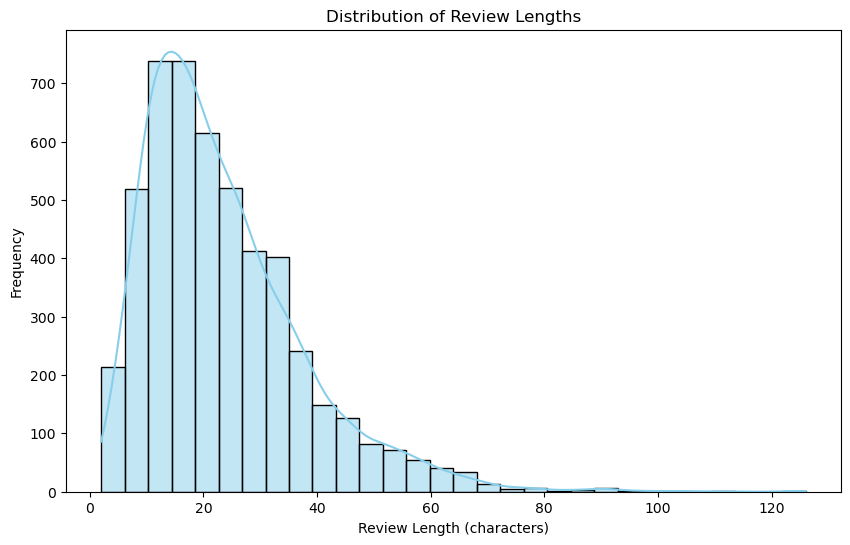

In [17]:
# Visualizing review text lengths
df['review_length'] = df['Summary'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (characters)')
plt.ylabel('Frequency')
plt.show()


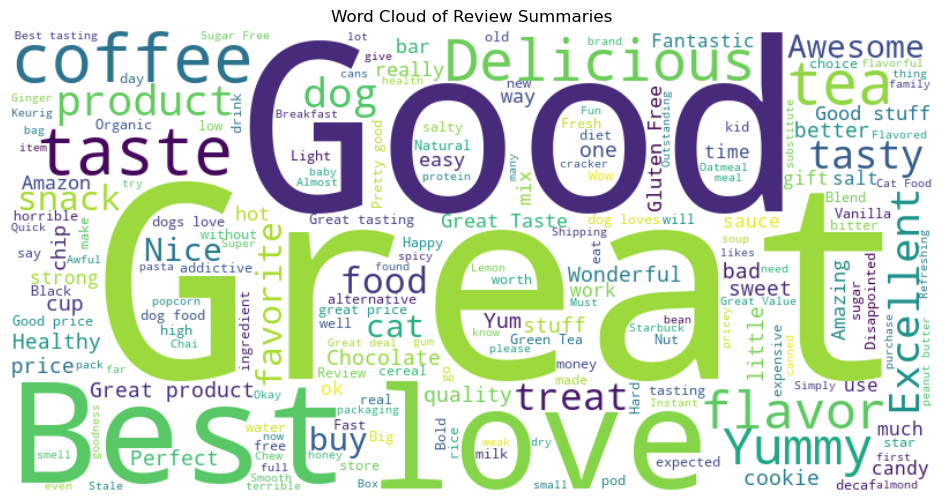

In [18]:
# Word cloud (if text-based)
from wordcloud import WordCloud

text = " ".join(df['Summary'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Summaries')
plt.show()


C:\Users\perei\AppData\Local\Temp\ipykernel_23748\4010540876.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette='viridis')


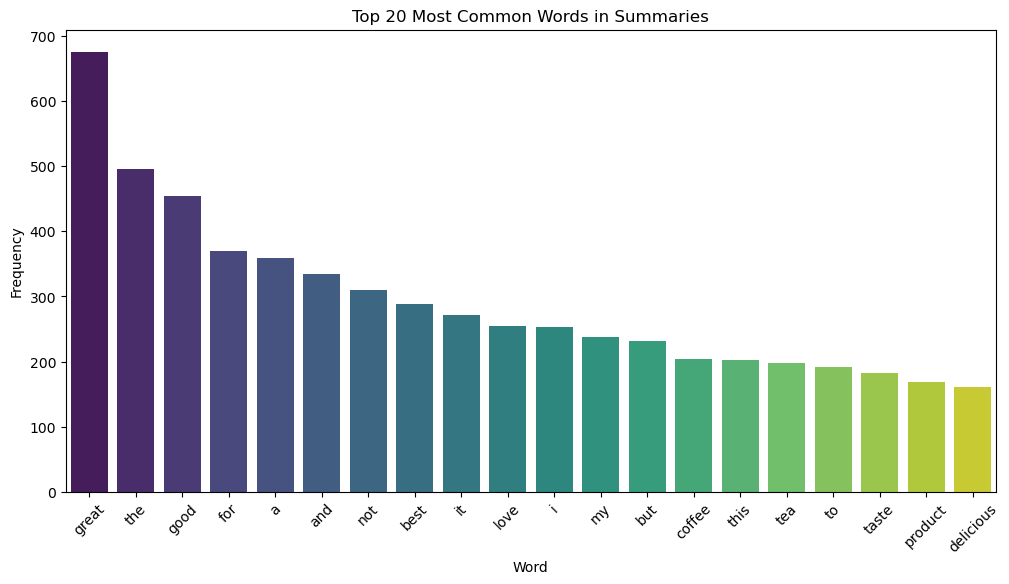

In [19]:
# Top 20 most common words (basic frequency count)
from collections import Counter
import re

words = []
for summary in df['Summary']:
    words += re.findall(r'\b\w+\b', summary.lower())

word_freq = Counter(words)
common_words = word_freq.most_common(20)

words, freqs = zip(*common_words)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(freqs), palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 20 Most Common Words in Summaries')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()


C:\Users\perei\AppData\Local\Temp\ipykernel_23748\396244479.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette='viridis')


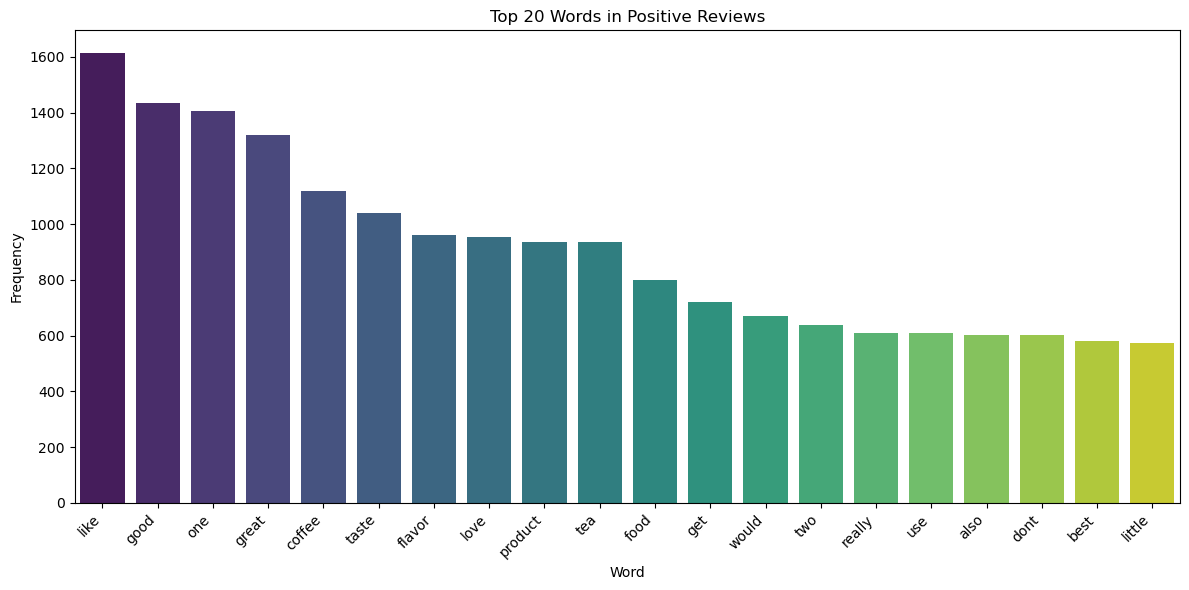

C:\Users\perei\AppData\Local\Temp\ipykernel_23748\396244479.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette='viridis')


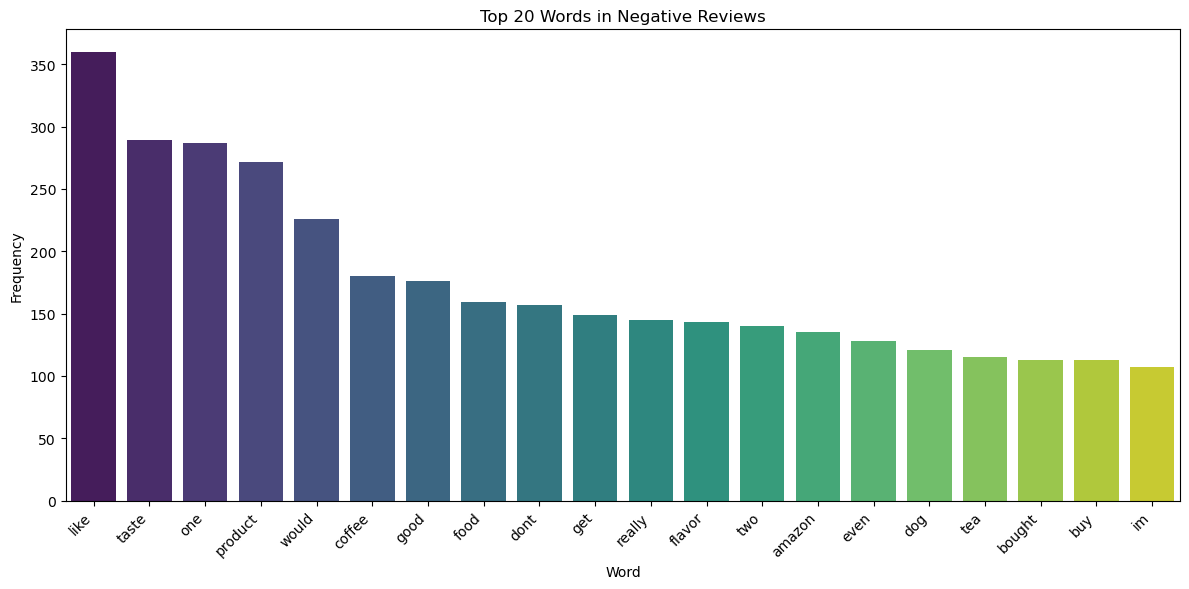

In [20]:
from collections import Counter

# Function to count word frequencies and display a bar graph
def word_frequency_graph(text_column, title="Top 20 Most Common Words", top_n=20):
    all_words = ' '.join(text_column).split()
    word_counts = Counter(all_words)
    common_words = word_counts.most_common(top_n)

    words, freqs = zip(*common_words)  # Unzip words and frequencies

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(words), y=list(freqs), palette='viridis')
    plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
    plt.title(title)
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.tight_layout()  # Adjusting layout to prevent labels from overlapping
    plt.show()

# Get common words for positive and negative reviews and display graphs
positive_reviews = df[df['Sentiment'] == 'positive']['clean_review']
negative_reviews = df[df['Sentiment'] == 'negative']['clean_review']

word_frequency_graph(positive_reviews, title="Top 20 Words in Positive Reviews")
word_frequency_graph(negative_reviews, title="Top 20 Words in Negative Reviews")

C:\Users\perei\AppData\Local\Temp\ipykernel_23748\278421220.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ngrams_strings, y=freqs, palette='viridis')


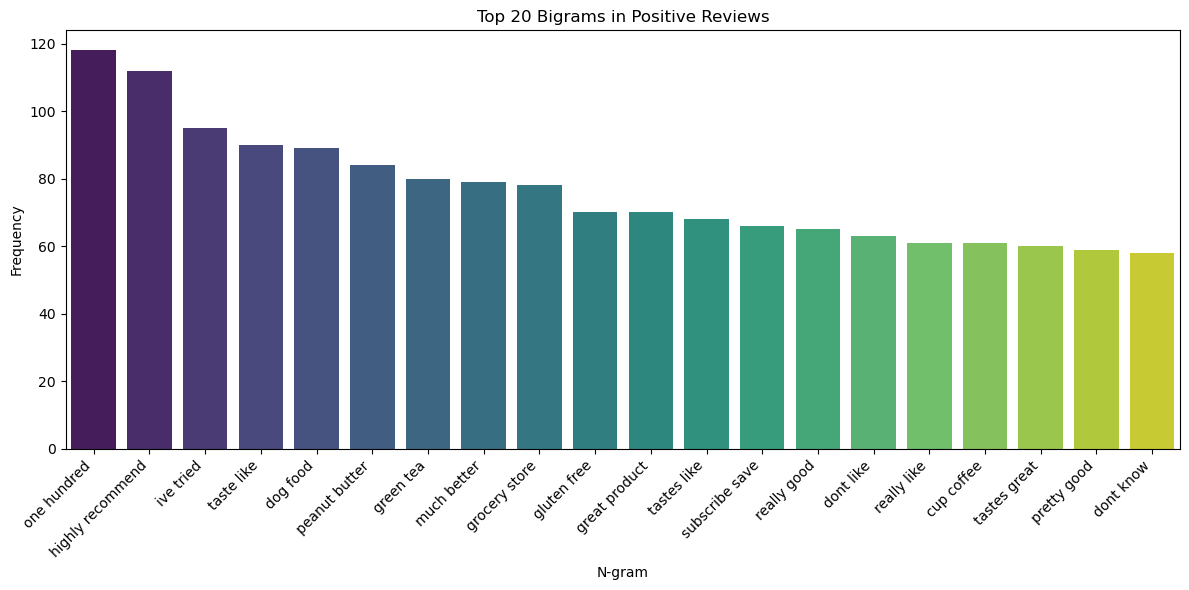

C:\Users\perei\AppData\Local\Temp\ipykernel_23748\278421220.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ngrams_strings, y=freqs, palette='viridis')


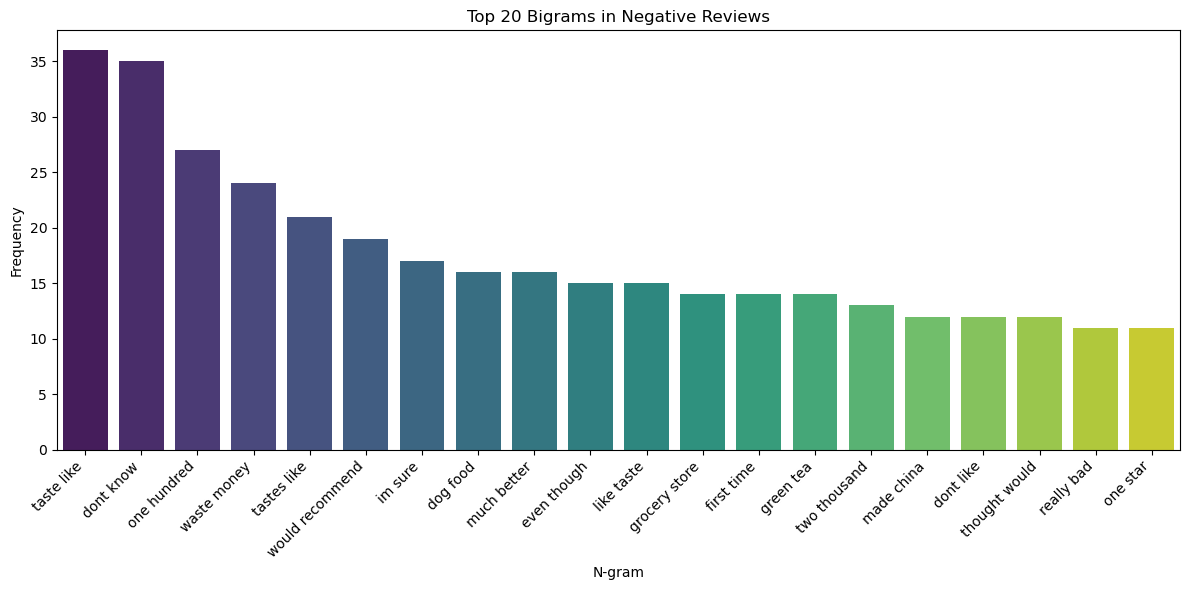

In [21]:
from nltk.util import ngrams

# Function to generate n-grams, count frequencies, and display a bar graph
def n_gram_frequency_graph(text_column, n=2, title=f"Top 20 Bigrams", top_n=20):
    n_grams = []
    for text in text_column:
        words = text.split()
        n_grams.extend(ngrams(words, n))
    n_gram_counts = Counter(n_grams)
    common_n_grams = n_gram_counts.most_common(top_n)

    # Convert n-grams to strings for plotting
    ngrams_strings = [" ".join(ngram) for ngram in dict(common_n_grams).keys()]
    freqs = list(dict(common_n_grams).values())

    plt.figure(figsize=(12, 6))
    sns.barplot(x=ngrams_strings, y=freqs, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.title(title)
    plt.xlabel("N-gram")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Get common bigrams (2-word phrases) and display graphs
positive_bigrams = df[df['Sentiment'] == 'positive']['clean_review']
negative_bigrams = df[df['Sentiment'] == 'negative']['clean_review']

n_gram_frequency_graph(positive_bigrams, n=2, title="Top 20 Bigrams in Positive Reviews")
n_gram_frequency_graph(negative_bigrams, n=2, title="Top 20 Bigrams in Negative Reviews")

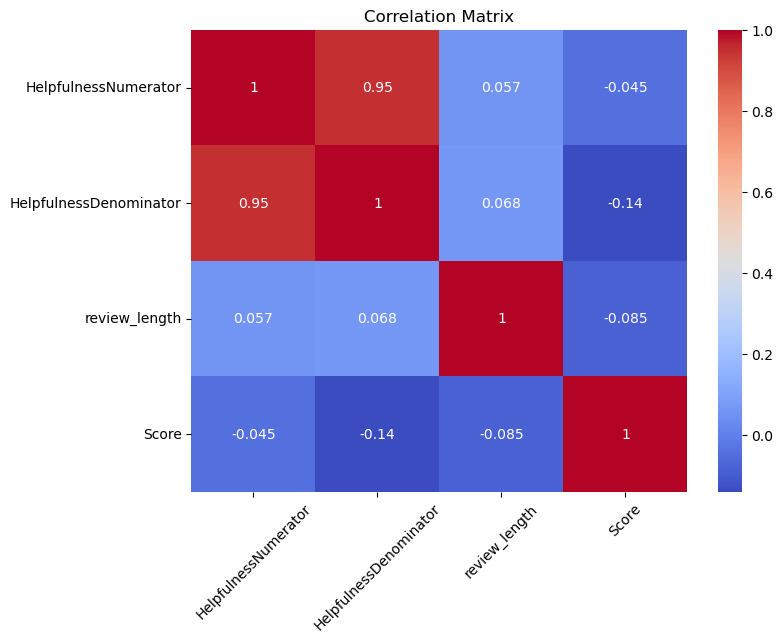

In [22]:
# Calculate the correlation matrix
correlation_matrix = df[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'review_length', 'Score']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

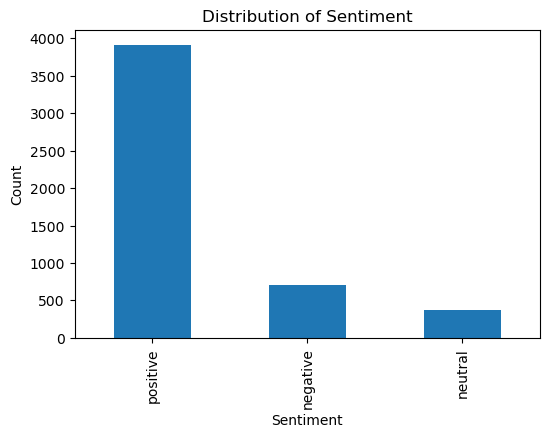

In [23]:
# Visualize the distribution of sentiment
plt.figure(figsize=(6, 4))
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Word Cloud for Positive Reviews


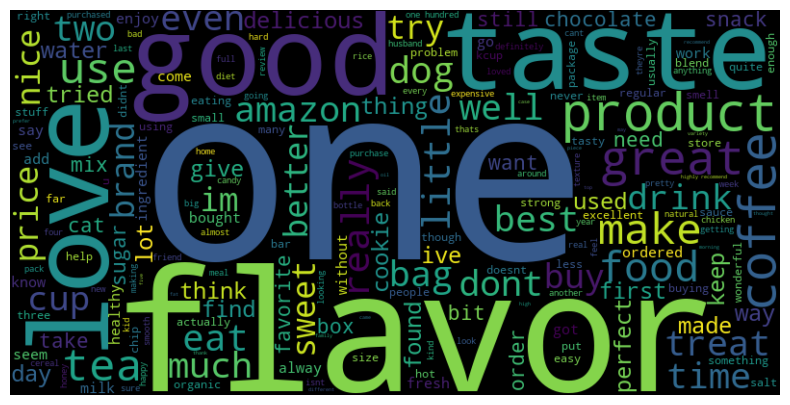

Word Cloud for Negative Reviews


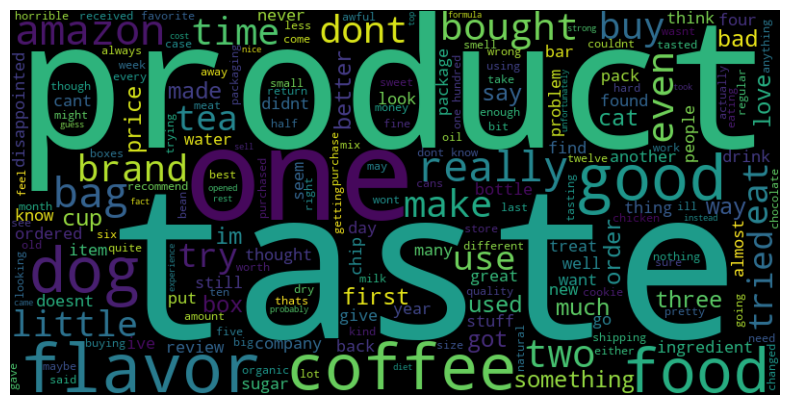

In [24]:
from wordcloud import WordCloud

# Function to generate word clouds
def generate_word_cloud(text_column):
    text = ' '.join(text_column)
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word clouds for positive and negative reviews
print("Word Cloud for Positive Reviews")
generate_word_cloud(positive_reviews)

print("Word Cloud for Negative Reviews")
generate_word_cloud(negative_reviews)

In [25]:
# Importing libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Tokenize the cleaned text
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")  # Keep only top 10,000 words
tokenizer.fit_on_texts(df['clean_review'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['clean_review'])

# Pad sequences to ensure they all have the same length
padded_sequences = pad_sequences(sequences, maxlen=200, truncating='post')  # Adjust maxlen as needed


X = padded_sequences
y = df['Sentiment_Label'].values  # Use the numerical labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Embedding(input_dim=10000, output_dim=16, input_length=200),  # Embedding layer
    LSTM(20),  # LSTM layer
    Dense(24, activation='relu'), # Dense layer with ReLU activation
    Dropout(0.5),  # Dropout layer, used to prevent overfitting
    Dense(1, activation='sigmoid')   # Output layer for binary classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()  # Displays the model architecture

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


C:\Users\perei\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


C:\Users\perei\AppData\Roaming\Python\Python312\site-packages\keras\src\losses\losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.1015 - loss: 0.0000e+00

C:\Users\perei\AppData\Roaming\Python\Python312\site-packages\keras\src\losses\losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.1013 - loss: 0.0000e+00 - val_accuracy: 0.0670 - val_loss: 0.0000e+00
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.0806 - loss: 0.0000e+00 - val_accuracy: 0.0670 - val_loss: 0.0000e+00
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.0707 - loss: 0.0000e+00 - val_accuracy: 0.0670 - val_loss: 0.0000e+00
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.0761 - loss: 0.0000e+00 - val_accuracy: 0.0670 - val_loss: 0.0000e+00
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.0794 - loss: 0.0000e+00 - val_accuracy: 0.0670 - val_loss: 0.0000e+00
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.0771 - loss: 0.0000e+00 - val_accuracy: 0.0670 - val_loss: 0.0000e+00
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.0748 - loss: 0.0000e+00 - val_accuracy: 0.0670 - val_loss: 0.0000e+00
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer # For one-hot encoding
from tensorflow.keras.callbacks import EarlyStopping # For early stopping
import numpy as np # For converting to numpy arrays

# 1. Data Preparation

# Tokenization and Padding (as before)
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_review'])
sequences = tokenizer.texts_to_sequences(df['clean_review'])
padded_sequences = pad_sequences(sequences, maxlen=200, truncating='post')

# One-hot encode the target variable (multi-class)
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(df['Sentiment_Label'])  # shape: (num_samples, num_classes)
# Convert to numpy array
y = np.array(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

# 2. Model Architecture (Multi-class)

def create_model(vocab_size, embedding_dim, max_length, num_classes):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
        LSTM(64, return_sequences=True), # Increased LSTM units
        LSTM(32),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # softmax for multi-class
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy', # categorical_crossentropy
                  metrics=['accuracy'])
    return model

vocab_size = 10000
embedding_dim = 32
max_length = 200
num_classes = y.shape[1] # Get number of classes from y

model = create_model(vocab_size, embedding_dim, max_length, num_classes)

# 3. Training the Model

model.summary()

# Add Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True) # Stop if val_loss doesn't improve for 3 epochs

history = model.fit(X_train, y_train,
                    epochs=20, # Increased epochs
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# 4. Evaluating the Model

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

C:\Users\perei\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 149ms/step - accuracy: 0.7458 - loss: 0.8152 - val_accuracy: 0.7920 - val_loss: 0.6418
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 141ms/step - accuracy: 0.7878 - loss: 0.6511 - val_accuracy: 0.8160 - val_loss: 0.5253
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 131ms/step - accuracy: 0.8623 - loss: 0.3757 - val_accuracy: 0.8140 - val_loss: 0.5566
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 37s 296ms/step - accuracy: 0.9074 - loss: 0.2467 - val_accuracy: 0.7930 - val_loss: 0.6659
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 126ms/step - accuracy: 0.9150 - loss: 0.1996 - val_accuracy: 0.7700 - val_loss: 0.7622
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8115 - loss: 0.5455
Test Loss: 0.5253
Test Accuracy: 0.8160
